# Application of Pandas and Data Visualization
## 資料來源
Vido Game Sales https://www.kaggle.com/gregorut/videogamesales

#### (資料時間為1980年~2016年)

In [1]:
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

## 資料讀取

In [2]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 資料清理
    -異常值
    -空值

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### 異常值

In [4]:
data.Year.max()

2020.0

In [5]:
#資料只到2016年
data.loc[5957,"Year"] = 2009
#NDS的發售遊戲年份不可能是1985年
data.loc[15867,"Year"] =2007

#### 空值

In [6]:
data[data.Year.isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [7]:
data1 = data.copy()
"""
for row in range( 0, data.shape[0]):
    if np.isnan(data.Year[row]):
        v = np.min(data.Year[ data.Name == data.Name[row]])
        data1.Year[row] = v

data1.Year = data1.Year.fillna(data1.groupby("Name")["Year"].transform("min"))

data1.Year.map(lambda x: re.search("[0-9]{4}",str(x)).group(0) if str(x).isalpha() == False else "NaT")
data1.Year.astype(str).str.split(".").map(lambda x : x[0])
"""
data1.Year = data1.Year.map(lambda x: str(int(x)) if np.isnan(x) == False else "NaT")
data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Visualization
### 遊戲主機
    -主機遊戲的銷售金額
    -主機遊戲的各種相關(correlation)
    -主機遊戲的各區域銷售金額
    -個別主機遊戲的各區域銷售金額佔比
### 遊戲類型
    -各類遊戲的銷售金額
    -個別遊戲類型的銷售金額佔比
### 遊戲公司
    -前15名上市遊戲數量(平台不重複)
    -前15名各遊戲的推行遊戲數量占比
### 年度冠軍
    -遊戲公司的上市遊戲數量
    -遊戲公司的銷售金額

## 遊戲主機

#### 主機遊戲的銷售金額

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


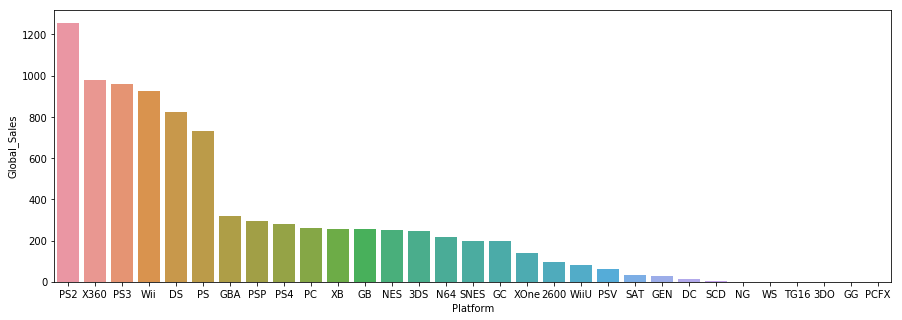

In [8]:
G_S_P = (data1[["Platform","Global_Sales"]]
             .groupby("Platform")
             .sum()
             .sort_values(by ="Global_Sales",ascending = False)
        )
plt.figure(figsize=(15,5))
sns.barplot(x =G_S_P.index , y ="Global_Sales",data = G_S_P)
plt.savefig("1.png")
G_S_P.head()

#### 主機遊戲的各種相關(correlation)

In [9]:
P_s=(data.iloc[:,1:11]
           .groupby("Platform")
           .agg(  #用字典可進行個別運算
                   {"Year":lambda x:(x.max()-x.min())+1, #主機目前壽命
                     "Name":"count", # Total_Game，遊戲數量
                     "Genre":lambda x: len(set(x)), #遊戲種類數量
                     "Publisher":lambda x: len(set(x)), #遊戲公司數量
                     "NA_Sales":"sum", #北美銷額
                     "EU_Sales":"sum", #歐洲銷額
                     "JP_Sales":"sum", #日本銷額
                     "Other_Sales":"sum", #其他區銷額(台灣在這裡，難過)
                     "Global_Sales":"sum"} #全球銷額
               )
           .rename(columns ={"Name":"Total_Game"})
           .sort_values("Global_Sales",ascending = False)
          )
P_s.head()

,Year,Total_Game,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
PS2,12.0,2161,12,173,583.84,339.29,139.20,193.44,1255.64
X360,12.0,1265,12,102,601.05,280.58,12.43,85.54,979.96
PS3,11.0,1329,12,105,392.26,343.71,79.99,141.93,957.84
Wii,10.0,1325,12,114,507.71,268.38,69.35,80.61,926.71
DS,11.0,2163,12,176,390.71,194.65,175.57,60.53,822.49


In [10]:
s = data.groupby(["Platform","Genre"])["Name"].count().unstack().fillna(0)
s.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61.0,2.0,2.0,5.0,9.0,11.0,6.0,0.0,24.0,1.0,12.0,0.0
3DO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3DS,182.0,37.0,14.0,53.0,28.0,20.0,11.0,86.0,7.0,30.0,26.0,15.0
DC,3.0,11.0,12.0,0.0,2.0,0.0,6.0,4.0,3.0,1.0,10.0,0.0
DS,343.0,240.0,36.0,393.0,92.0,238.0,67.0,200.0,42.0,285.0,148.0,79.0


In [11]:
ss = pd.merge(P_s,s,left_index = True, right_index = True)
sss = ss.corr()
ss.head()

,Year,Total_Game,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,,,,,,,,,,
PS2,12.0,2161,12,173,583.84,339.29,139.20,193.44,1255.64,348.0,...,150.0,222.0,103.0,18.0,216.0,187.0,160.0,90.0,400.0,71.0
X360,12.0,1265,12,102,601.05,280.58,12.43,85.54,979.96,324.0,...,65.0,126.0,24.0,7.0,105.0,76.0,203.0,40.0,220.0,28.0
PS3,11.0,1329,12,105,392.26,343.71,79.99,141.93,957.84,380.0,...,76.0,124.0,37.0,3.0,92.0,119.0,156.0,31.0,213.0,24.0
Wii,10.0,1325,12,114,507.71,268.38,69.35,80.61,926.71,238.0,...,42.0,280.0,58.0,55.0,94.0,35.0,66.0,87.0,261.0,25.0
DS,11.0,2163,12,176,390.71,194.65,175.57,60.53,822.49,343.0,...,36.0,393.0,92.0,238.0,67.0,200.0,42.0,285.0,148.0,79.0


,Year,Total_Game,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,1.000000,0.482746,0.557229,0.572988,0.370525,0.436229,0.303065,0.317516,0.404283,0.433124,...,0.273185,0.264769,0.248774,0.241667,0.397968,0.487954,0.572508,0.456207,0.336681,0.822223
Total_Game,0.482746,1.000000,0.535041,0.950783,0.866034,0.867838,0.663201,0.817195,0.901686,0.933752,...,0.801786,0.889216,0.726822,0.630594,0.857069,0.881125,0.733692,0.787929,0.888311,0.633678
Genre,0.557229,0.535041,1.000000,0.650230,0.484858,0.467445,0.470688,0.363493,0.501736,0.560063,...,0.460423,0.390911,0.499241,0.268209,0.479226,0.499994,0.458619,0.319215,0.480382,0.363832
Publisher,0.572988,0.950783,0.650230,1.000000,0.767395,0.806964,0.670728,0.713879,0.821265,0.883769,...,0.775412,0.784756,0.687704,0.583753,0.817578,0.897777,0.698984,0.748815,0.814193,0.730663
NA_Sales,0.370525,0.866034,0.484858,0.767395,1.000000,0.933648,0.556274,0.850591,0.977849,0.852499,...,0.770034,0.793371,0.631005,0.398119,0.845949,0.602412,0.791114,0.567886,0.923321,0.372929


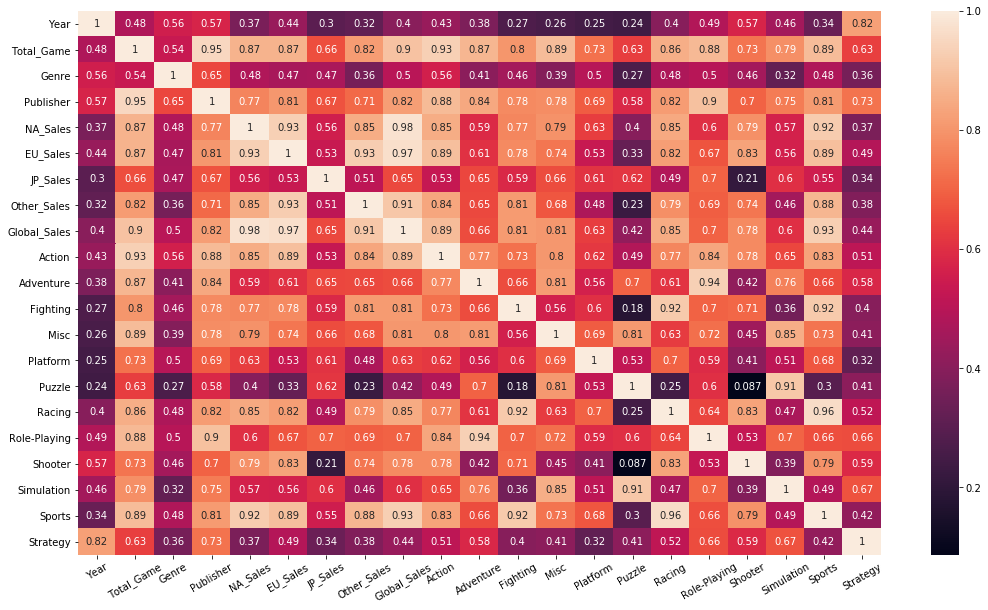

In [12]:
plt.subplots(figsize=(18,10))
ax =sns.heatmap(sss,annot = True)
plt.xticks(rotation=30)
plt.savefig("2.png")
sss.head()

#### 主機遊戲的各區域銷售金額

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PS2,583.84,339.29,139.20,193.44
X360,601.05,280.58,12.43,85.54
PS3,392.26,343.71,79.99,141.93
Wii,507.71,268.38,69.35,80.61
DS,390.71,194.65,175.57,60.53


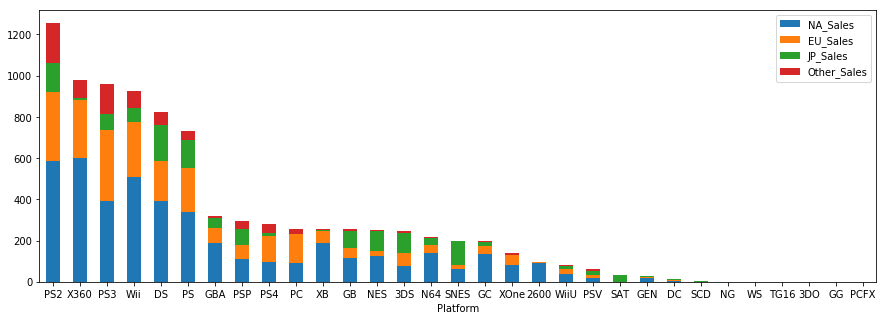

In [13]:
ax =P_s.iloc[:,4:8]
ax.plot.bar(stacked =True,figsize = (15,5),rot =0)
plt.savefig("3.png")
ax.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PS2,46.492590,27.018483,11.084832,15.404095
X360,61.356676,28.642303,1.268885,8.732136
PS3,40.950422,35.881991,8.350646,14.816941
Wii,54.825333,28.981157,7.488797,8.704714
DS,47.562876,23.695615,21.372921,7.368588


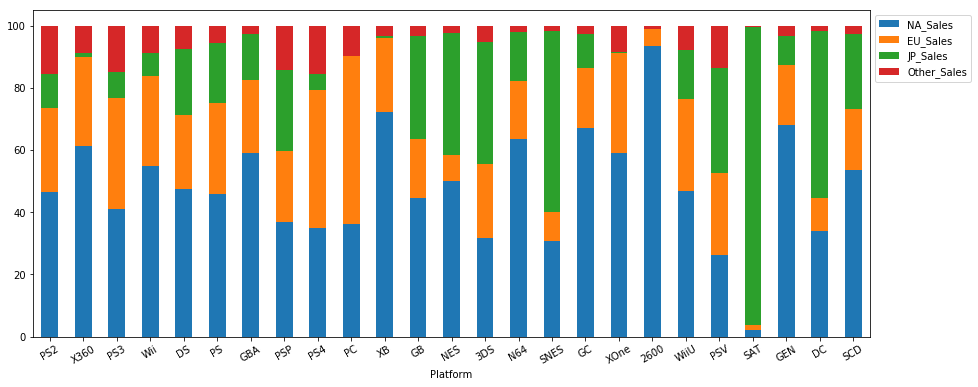

In [14]:
ax = (P_s.iloc[:,4:8]
          .agg(lambda x:(x/x.sum())*100,axis =1) #計算百分比 , axis= 1 以列為計算單位
          .iloc[0:-6]
     )
ax.plot.bar(stacked =True,figsize = (15,6))
plt.xticks(rotation=30)
plt.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=1)
plt.savefig("4.png")
ax.head()

### 遊戲類型

#### 各類遊戲的銷售金額

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64

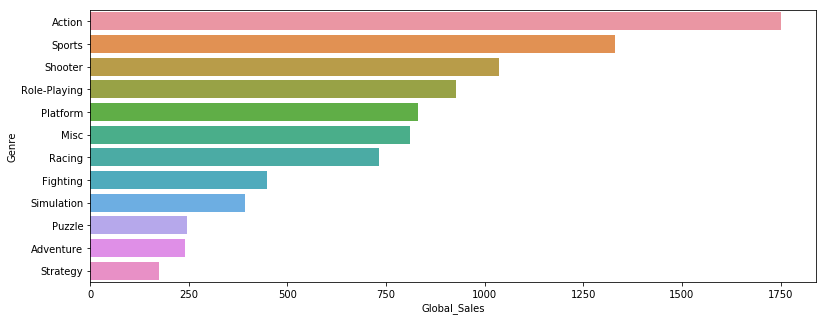

In [33]:
G_S_T=data.groupby("Genre").sum().sort_values(by ="Global_Sales",ascending = False)
plt.figure(figsize = (13,5))
sns.barplot( x = G_S_T.Global_Sales, y = G_S_T.index)
plt.savefig("5.png")
G_S_T["Global_Sales"].head()

#### 個別遊戲類型的銷售金額佔比

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,50.157128,29.997257,9.139164,10.706450
Sports,51.358847,28.323087,10.174065,10.144002
Shooter,56.189962,30.213919,3.691987,9.904132
Role-Playing,35.295386,20.281259,37.994737,6.428618
Platform,53.794041,24.262370,15.735705,6.207884


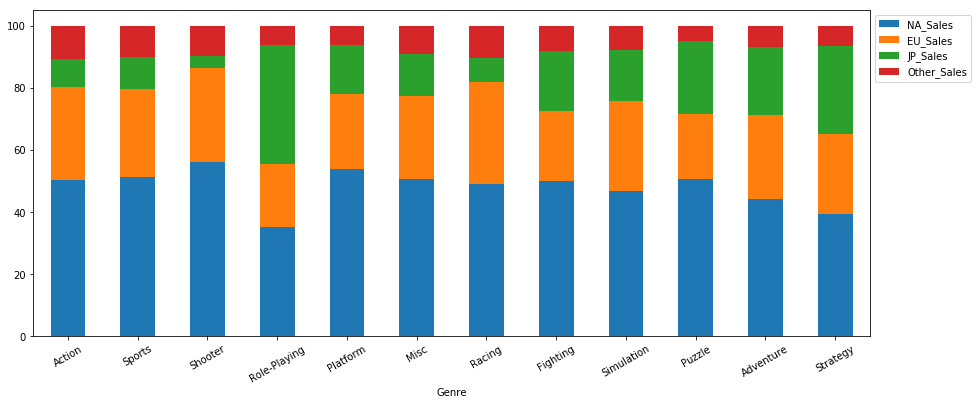

In [16]:
ax = G_S_T.iloc[:,2:6].agg(lambda x: (x/sum(x))*100,axis = 1)
ax.plot.bar(stacked =True,figsize = (15,6))
plt.xticks(rotation=30)
plt.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=1)
plt.savefig("6.png")
ax.head()

#### 前15名上市遊戲數量(平台不重複)

Publisher
Namco Bandai Games              776
Nintendo                        667
Konami Digital Entertainment    640
Sony Computer Entertainment     622
Electronic Arts                 607
Name: Release, dtype: int64

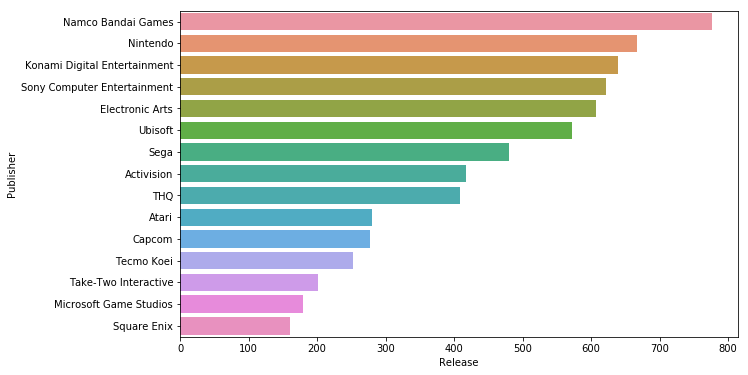

In [23]:
data2 = (data1[["Publisher","Name","Genre"]]
            .drop_duplicates() #遊戲公司發行的遊戲可能會在多個主機上發售，因我們要的是上市的遊戲款數，故刪除重複值
            .dropna() #刪除含空值的遊戲公司跟遊戲類型的data
        )
data2 =data2[data2.Publisher != "Unknown"] #排除含不知名的data
p_c = data2.groupby("Publisher").count().sort_values("Name",ascending = False).rename(columns = {"Name":"Release"})
plt.figure(figsize=(10,6))
sns.barplot(x ="Release", y = p_c.head(15).index, data = p_c.head(15))
p_c["Release"].head()

### 遊戲公司

#### 前15名各遊戲的推行遊戲數量占比

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Square Enix,13.664596,3.726708,1.863354,3.726708,0.000000,2.484472,0.000000,62.732919,4.347826,2.484472,0.000000,4.968944
Microsoft Game Studios,11.731844,1.675978,2.793296,17.877095,3.351955,0.558659,11.731844,7.821229,13.966480,8.938547,9.497207,10.055866
Take-Two Interactive,23.383085,4.975124,0.497512,8.457711,2.487562,0.497512,6.467662,1.492537,13.432836,1.990050,29.353234,6.965174
Tecmo Koei,33.201581,5.928854,2.766798,4.743083,0.395257,0.000000,1.581028,15.810277,0.790514,5.138340,12.648221,16.996047
Capcom,36.823105,7.220217,15.162455,3.610108,13.718412,1.805054,2.888087,11.552347,4.693141,0.722022,1.083032,0.722022


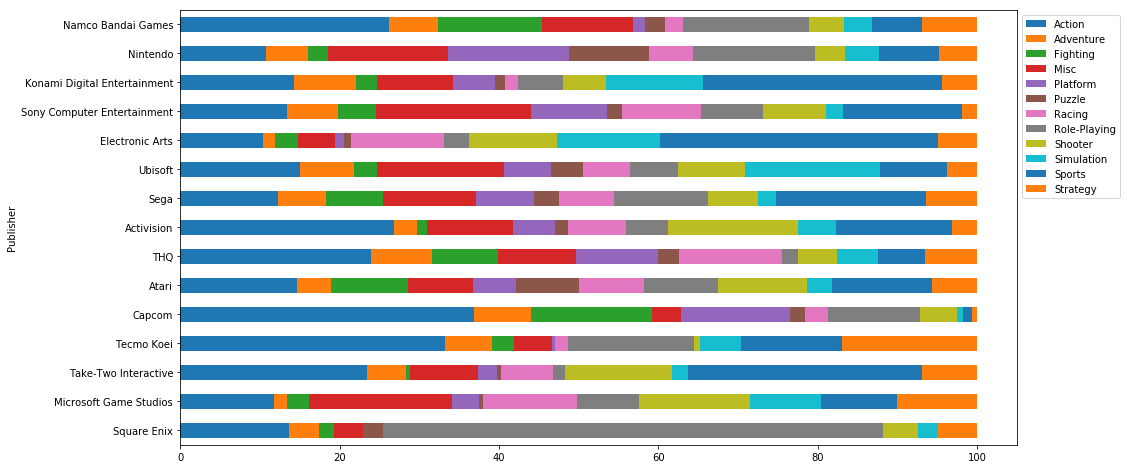

In [18]:
x = data2.groupby(["Publisher","Genre"])["Name"].count().rename(columns = {"Name":"Release"}).unstack().fillna(0)
xx = pd.merge(p_c["Release"],x,left_index = True,right_index = True)
ax = xx.sort_values("Release",ascending = True).agg(lambda x:(x/x[0])*100,axis =1).iloc[:,1:].tail(15)
ax.plot.barh(stacked =True,figsize = (15,8))
plt.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=1)
plt.savefig("8.png")
ax.head()

### 年度冠軍

In [19]:
data3 = data1[(data1.Year != "NaT")&(data1.Publisher != "Unknown")] #年份不明，遊戲公司不明的資料不列入
"""
Method 1:
a = data3[data3.Year != "NaT"][["Year","Publisher"]].groupby("Year").agg(lambda x :x.value_counts().index[0]) #pd.Series.mode
b = data3[data3.Year != "NaT"][["Year","Publisher","Rank"]].groupby(["Year","Publisher"]).count().agg("max",level =0)
c = pd.concat([a,b],axis =1)
c.plot.bar(figsize=(15,5))

Method 2:
try1 = data3.groupby(["Year","Publisher"])["Rank"].count().reset_index().rename(columns = {"Rank":"Count"})
g = []
for i in try1.Year.unique():
    k = try1[(try1.Year == i)&(try1["Count"] == try1[try1["Year"] == i].Count.max())]
    g.append(k)
g = pd.concat(g,ignore_index = True)
"""

Year_top = (data3
            .groupby(["Year","Publisher"])["Name","Global_Sales"] #分組後選出 Name 跟 G_S這兩個欄位
            .agg({"Name":"count","Global_Sales":"sum"}) #分行運算
            .rename(columns = {"Name":"Release"})
            )

P_R = (Year_top["Release"].reset_index()
            .groupby("Year")
            .apply(lambda x:x.nlargest(1,"Release"))
            .reset_index(drop = True)
      )
P_G = (Year_top["Global_Sales"].reset_index()
            .groupby("Year")
            .apply(lambda x:x.nlargest(1,"Global_Sales"))
            .reset_index(drop = True)
      )
Year_top.head()

Release  Global_Sales
Year Publisher                                          
1980 Activision                          5          3.02
     Atari                               4          8.36
1981 20th Century Fox Video Games        3          1.35
     Activision                          6          8.50
     Atari                              11          8.45

#### 遊戲公司的上市遊戲數量

,Year,Publisher,Release
0,1980,Activision,5
1,1981,Atari,11
2,1982,Atari,14
3,1983,Atari,6
4,1984,Nintendo,9


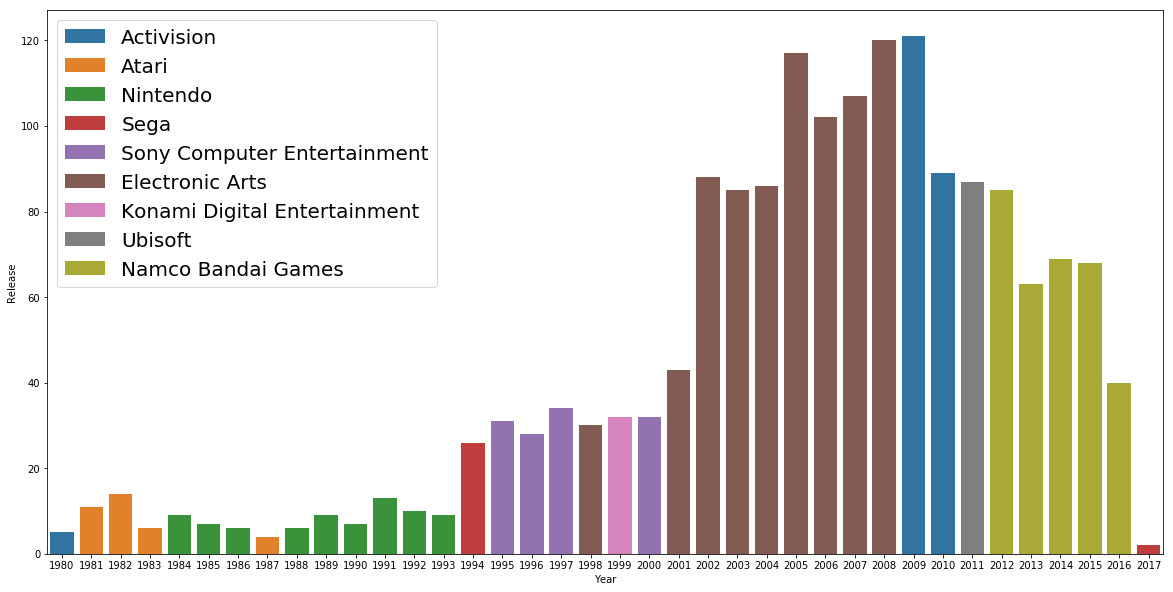

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(y = "Release",x = "Year",data = P_R,hue = "Publisher",dodge = False)
plt.legend(fontsize=20)
plt.savefig("13.png")
P_R.head()

#### 遊戲公司的銷售金額

,Year,Publisher,Global_Sales
0,1980,Atari,8.36
1,1981,Activision,8.50
2,1982,Atari,19.43
3,1983,Nintendo,10.96
4,1984,Nintendo,45.56


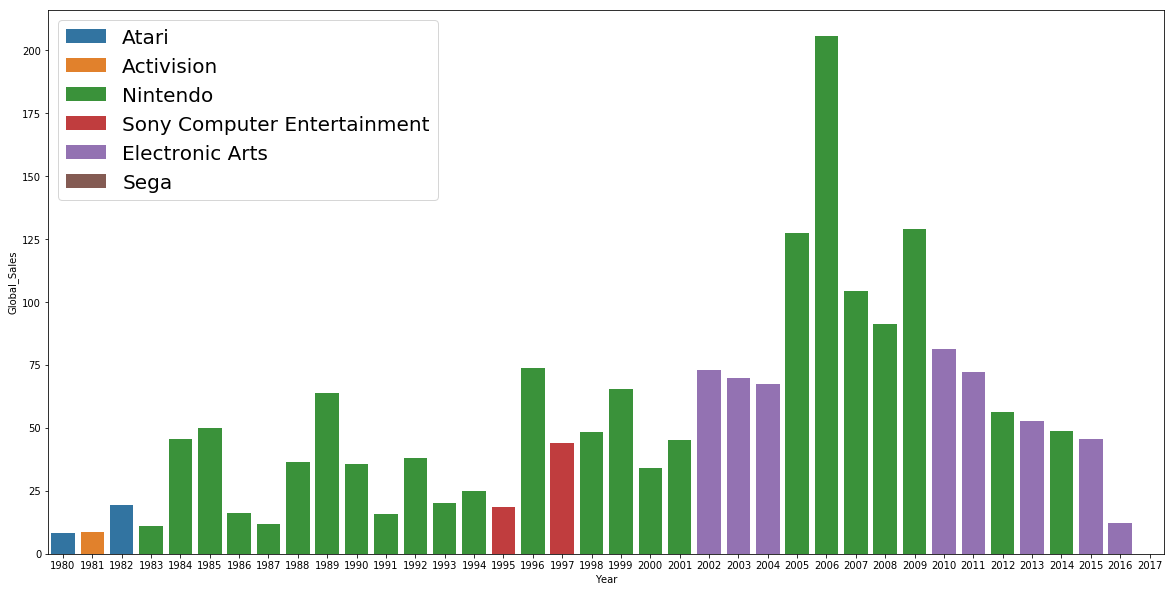

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(y = "Global_Sales",x = "Year",data = P_G,hue = "Publisher",dodge = False)
plt.legend(fontsize=20)
plt.savefig("15.png")
P_G.head()